# 📊 Customer Support Tickets – Data Cleaning & Exploratory Data Analysis 

### 🔍 A Comprehensive Project by **Yashveer Dalal**  
**📅 Date:** July 12, 2025  

---

## 📝 Project Overview  
This project focuses on cleaning and analyzing real-world customer support ticket data. The objective is to ensure data quality and draw actionable insights related to customer behavior, common support issues, product trends, and operational efficiency.  

By applying practical data cleaning techniques and exploratory data analysis, this project demonstrates my ability to prepare messy data, visualize trends, and uncover hidden patterns that drive business decisions.

---

## 🛠️ Tools & Technologies Used  
- **Python** 🐍  
- **pandas** – for data cleaning and manipulation  
- **matplotlib & seaborn** – for professional data visualization  
- **Jupyter Notebook** – for interactive coding and documentation  

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', palette='pastel', font_scale=1.2)


df = pd.read_csv('customer_support_tickets.csv')


df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], errors='coerce')
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')


df['Resolution Duration (hrs)'] = (
    (df['Time to Resolution'] - df['First Response Time']).dt.total_seconds() / 3600
)

In [2]:
print("Total Tickets:", len(df))
print("Closed Tickets:", df[df['Ticket Status'] == 'Closed'].shape[0])
print("\nTickets by Priority:\n", df['Ticket Priority'].value_counts())
print("\nTickets by Channel:\n", df['Ticket Channel'].value_counts())
print("\nTop 5 Products with Most Tickets:\n", df['Product Purchased'].value_counts().head(5))
print("\nAverage Satisfaction Rating:", round(df['Customer Satisfaction Rating'].mean(), 2))
print("\nAvg Resolution Duration (hrs):", round(df['Resolution Duration (hrs)'].mean(), 2))
print("\nMissing Resolutions:", df['Resolution'].isnull().sum())
print("\nMonthly Tickets (Recent):\n", df['Date of Purchase'].dt.to_period('M').value_counts().sort_index().tail(5))
print("\nAvg Age by Gender:\n", df.groupby('Customer Gender')['Customer Age'].mean().round(1))


Total Tickets: 8469
Closed Tickets: 2769

Tickets by Priority:
 Ticket Priority
Medium      2192
Critical    2129
High        2085
Low         2063
Name: count, dtype: int64

Tickets by Channel:
 Ticket Channel
Email           2143
Phone           2132
Social media    2121
Chat            2073
Name: count, dtype: int64

Top 5 Products with Most Tickets:
 Product Purchased
Canon EOS             240
GoPro Hero            228
Nest Thermostat       225
Philips Hue Lights    221
Amazon Echo           221
Name: count, dtype: int64

Average Satisfaction Rating: 2.99

Avg Resolution Duration (hrs): -0.06

Missing Resolutions: 5700

Monthly Tickets (Recent):
 Date of Purchase
2021-08    364
2021-09    327
2021-10    362
2021-11    364
2021-12    346
Freq: M, Name: count, dtype: int64

Avg Age by Gender:
 Customer Gender
Female    43.8
Male      44.0
Other     44.3
Name: Customer Age, dtype: float64


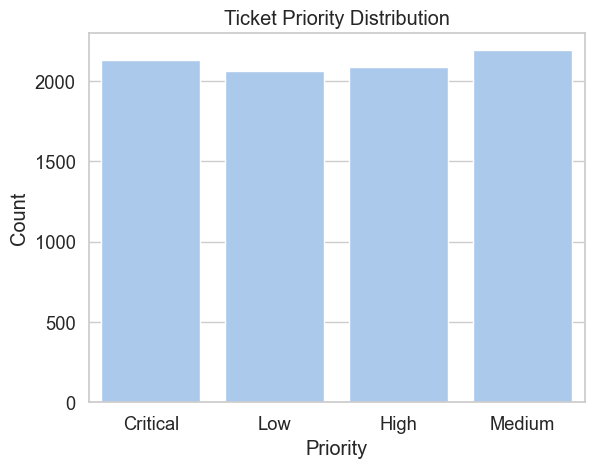

In [6]:
sns.countplot(x='Ticket Priority', data=df)
plt.title('Ticket Priority Distribution')
plt.xlabel('Priority')
plt.ylabel('Count')
plt.show()



## Ticket Priority Distribution


This chart displays how support tickets are distributed across priority levels (e.g., Low, Medium, High, Critical).

- **Purpose**: To understand the urgency profile of incoming tickets and assess whether the support team faces many high‑priority issues or mostly routine requests.
- **Insight**:
  - A higher count of **High** or **Critical** tickets signals the need for more rapid‑response resources.
  - A dominance of **Low/Medium** tickets may suggest routine inquiries that could be automated or self‑served.
- **Chart Type**: Vertical bar chart.
- **Metric Displayed**: Frequency (count) of tickets per `Ticket Priority` category.
- **Styling Notes**:
  - Sort bars logically (Critical → High → Medium → Low) for intuitive reading.
  - Add value labels above bars for quick reference.




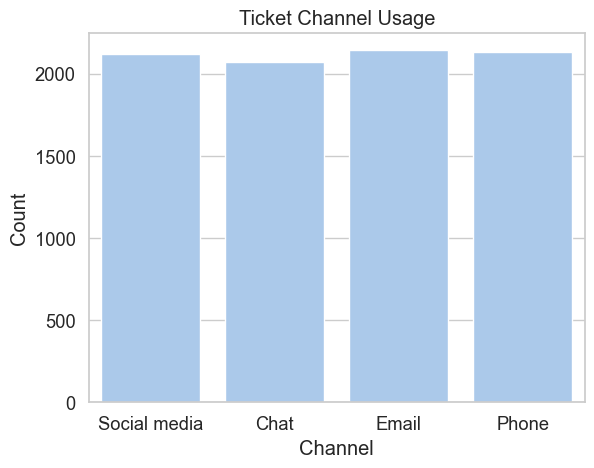

In [7]:
sns.countplot(x='Ticket Channel', data=df)
plt.title('Ticket Channel Usage')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.show()


## Ticket Channel Usage



This graph shows the number of support tickets received via different communication channels: **Chat**, **Email**, **Phone**, and **Social Media**.

- **Purpose**: To understand which channels are most used by customers for support.
- **Insight**: 
  - **Email** and **Phone** are the most common channels.
  - **Social Media** has a moderate share.
  - **Chat** is the least used, suggesting it may require UX improvements, better visibility, or promotion.
- **Chart Type**: Vertical column chart.
- **Metric Displayed**: Count of tickets per channel.



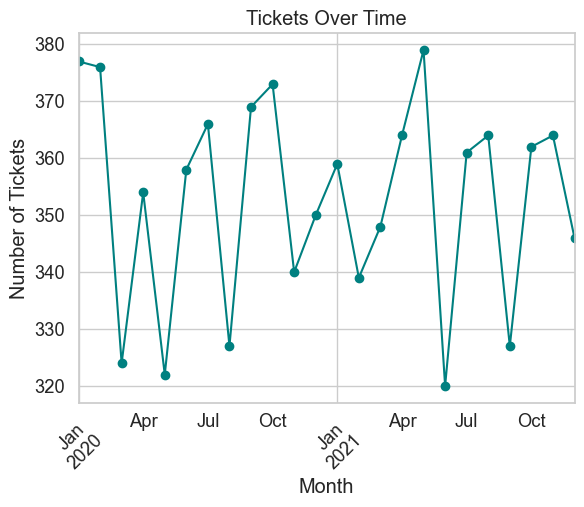

In [8]:
monthly = df['Date of Purchase'].dt.to_period('M').value_counts().sort_index()
monthly.plot(kind='line', marker='o', color='teal')
plt.title('Tickets Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Tickets Over Time


This graph visualizes how the number of support tickets has changed over time on a monthly basis.

- **Purpose**: To identify patterns, seasonality, or trends in customer support demand.
- **Insight**:
  - Clear peaks may indicate periods of high demand (e.g., holidays, product launches).
  - Dips may show off-season periods or improved product stability.
- **Chart Type**: Line chart with circular markers for monthly data points.
- **Metric Displayed**: Count of tickets grouped by month using `df['Date of Purchase'].dt.to_period('M')`.
- **Styling Notes**:
  - Teal-colored line for visibility.
  - X-axis labels rotated 45° for readability.
  - Grid enabled for clearer interpretation.


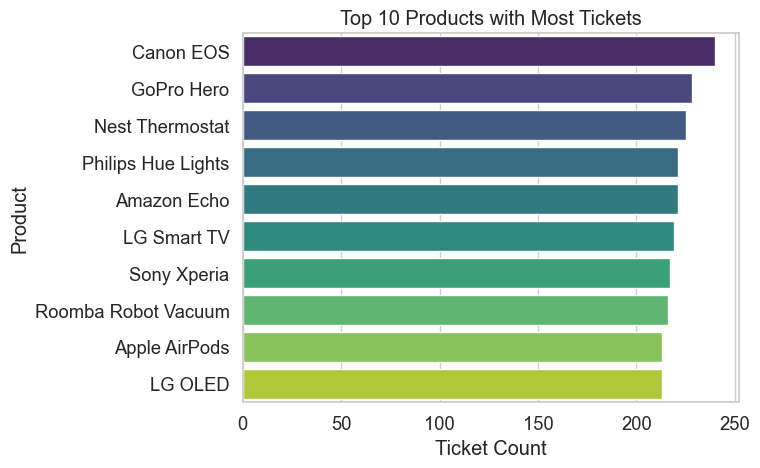

In [3]:
top_products = df['Product Purchased'].value_counts().head(10)

sns.barplot(
    y=top_products.index,
    x=top_products.values,
    hue=top_products.index,
    palette='viridis',
    dodge=False,
    legend=False
)

plt.title('Top 10 Products with Most Tickets')
plt.xlabel('Ticket Count')
plt.ylabel('Product')
plt.show()



## Top 10 Products with Most Tickets

This chart highlights which products generate the greatest number of support tickets.

- **Purpose**: Pinpoint products that create the heaviest support load, signaling potential quality issues or high usage.
- **Insight**:
  - Products at the top of the list may need improved documentation, additional training, or bug fixes.
  - Comparing ticket counts helps prioritize development and support resources.
- **Chart Type**: Horizontal bar chart  – ideal for long product names and clear ranking.
- **Metric Displayed**: Ticket count by `Product Purchased`, showing only the 10 highest‑volume products.
- **Styling Notes**:
  - Sorted in descending order.
  - Label bars with ticket counts (and optionally percentages) for clarity.


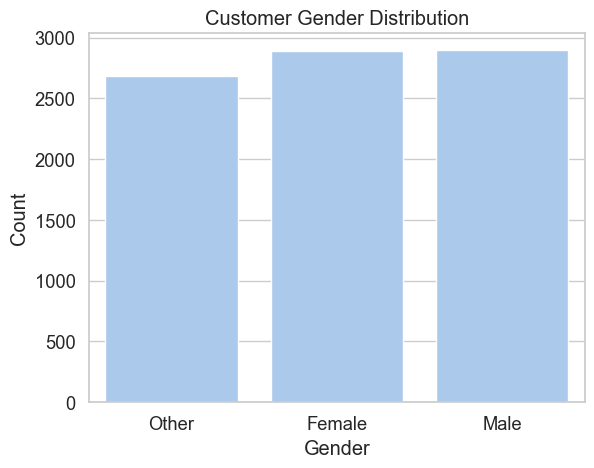

In [11]:
sns.countplot(x='Customer Gender', data=df)
plt.title('Customer Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


## Customer Gender Distribution

This chart shows the distribution of customer tickets by gender.

- **Purpose**: To understand the gender demographics of customers submitting support tickets.
- **Insight**:
  - Highlights the proportion of male, female, and other/non-specified genders engaging with support.
  - Useful for tailoring communication and service strategies.
- **Chart Type**: Vertical count plot (`sns.countplot`).
- **Metric Displayed**: Count of tickets grouped by  Gender.
- **Styling Notes**: Simple categorical bar chart with axis labels and title.




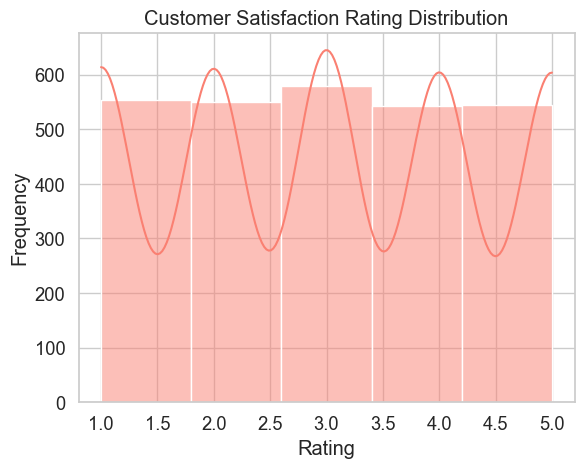

In [12]:
sns.histplot(df['Customer Satisfaction Rating'].dropna(), bins=5, kde=True, color='salmon')
plt.title('Customer Satisfaction Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


## Customer Satisfaction Rating Distribution

This histogram shows the distribution of customer satisfaction ratings.

- **Purpose**: To analyze how customers rate their support experience, identifying trends or clusters in satisfaction.
- **Insight**:
  - Reveals the most common rating ranges.
  - The KDE (kernel density estimate) smooths the distribution for better pattern visibility.
- **Chart Type**: Histogram with KDE overlay .
- **Metric Displayed**: Frequency counts of `Customer Satisfaction Rating` values, binned into 5 groups.
- **Styling Notes**: Salmon color for visual appeal; axis labels and title included.



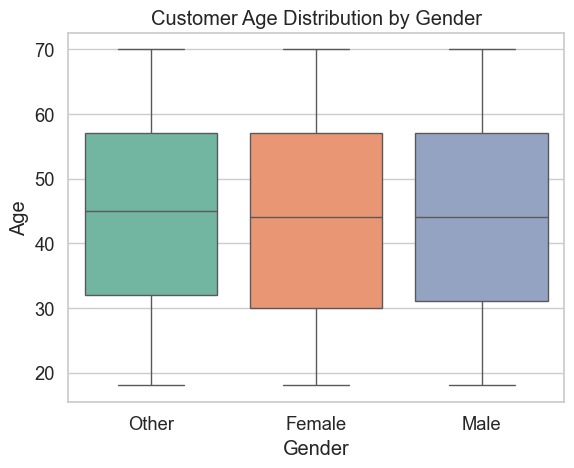

In [ ]:
sns.boxplot(
    x='Customer Gender',
    y='Customer Age',
    data=df,
    hue='Customer Gender',   
    palette='Set2',
    legend=False             
)
plt.title('Customer Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()



## Customer Age Distribution by Gender

This boxplot shows how customer ages vary across different gender categories.

- **Purpose**: To explore age demographics segmented by gender among customers submitting tickets.
- **Insights**:
  - Median ages differ by gender, revealing distinct age groups for each category.
  - The spread  and presence of outliers indicate variability and unusual ages.
  - Useful for tailoring support strategies and understanding customer profiles.
- **Chart Type**: Boxplot  with the Set2 color palette.
- **Metrics Displayed**: Age distribution by gender, highlighting median, quartiles, and outliers.



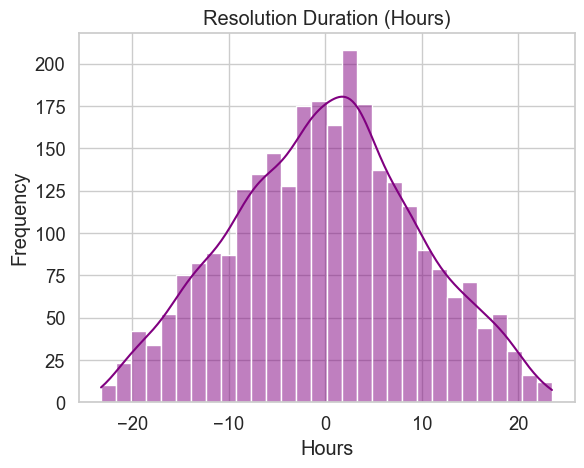

In [14]:
sns.histplot(df['Resolution Duration (hrs)'].dropna(), bins=30, kde=True, color='purple')
plt.title('Resolution Duration (Hours)')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()


## Resolution Duration (Hours)

This histogram visualizes the distribution of ticket resolution times in hours.

- **Purpose**: To understand how long it typically takes to resolve customer support tickets.
- **Insights**:
  - Reveals common resolution time ranges.
  - The KDE curve smooths the distribution for better pattern recognition.
- **Chart Type**: Histogram with KDE overlay.
- **Metric Displayed**: Frequency of `Resolution Duration` values, split into 30 bins.
- **Styling Notes**: Purple color for clarity; includes axis labels and title.




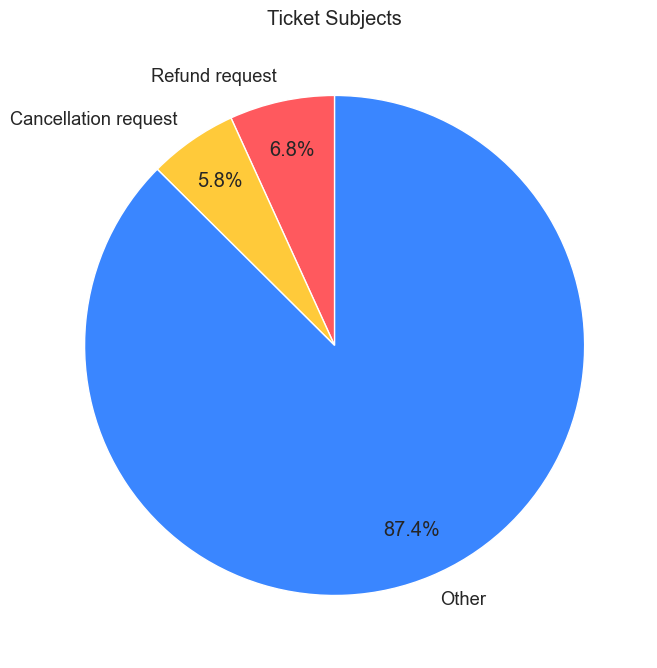

In [ ]:


vc = df['Ticket Subject'].value_counts()


keep_labels = ['Technical issue', 'Refund request', 'Cancellation request',
               'Billing inquiry', 'Product inquiry']


existing_labels = [label for label in keep_labels if label in vc.index]

top5 = vc[existing_labels]


other_count = vc.drop(existing_labels).sum()
if other_count > 0:
    top5['Other'] = other_count


plt.figure(figsize=(7, 7))
top5.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff595e', '#ffca3a', '#3a86ff', '#1982c4', '#6a4c93', '#8ac926'],
    pctdistance=0.8
)

plt.title('Ticket Subjects')
plt.ylabel('')
plt.tight_layout()
plt.show()


# 🎯 Ticket Subjects Breakdown

This pie chart shows the distribution of customer support tickets by subject.  
It highlights the **top 5 most common reasons** customers reach out:

- 🛠️ Technical Issues  
- 💸 Refund Requests  
- ❌ Cancellation Requests  
- 🧾 Billing Inquiries  
- 📦 Product Inquiries  

All other less frequent subjects are grouped under **"Other"** to maintain clarity.

---

### 📊 What This Helps With

Understanding which subjects generate the most tickets allows us to:

- Identify and fix recurring issues (e.g., tech bugs, billing confusion)
- Reduce refund and cancellation rates by improving user experience
- Improve self-service resources (FAQs, help docs)
- Monitor changes in customer behavior over time

This chart helps prioritize improvements that can lead to **higher customer satisfaction** and **lower support workload**.


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

---

## Summary

This report presents a comprehensive analysis of customer support tickets, covering channel usage, ticket priorities, customer demographics, product issues, satisfaction ratings, and resolution times.

The insights gained can help optimize support resources, tailor customer communication, and improve overall service quality.


